<a href="https://colab.research.google.com/github/ErikVegaC/OTO-O2024/blob/main/Tarea_Caminata_aleatoria_resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Caminata aleatoria

Erik Gabriel Vega Cervantes  
Expediente : 745264

A 16 de octubre de 2024

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

In [29]:

import numpy as np


t = 10

dt = 0.001

n = 10000

w = np.zeros((n,3))
X_i = np.random.choice([-1,1],(n,3))

def mov_brown(dt,w,n):
  for i in range(1,n):
    w[i] = w[i-1] + (X_i[i]*np.sqrt(dt))
  return w



mov_brown(dt, w, n)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.03162278, -0.03162278, -0.03162278],
       [ 0.06324555, -0.06324555, -0.06324555],
       ...,
       [ 2.05548048, -5.4074948 ,  5.21775814],
       [ 2.0238577 , -5.43911758,  5.24938092],
       [ 2.05548048, -5.47074035,  5.21775814]])

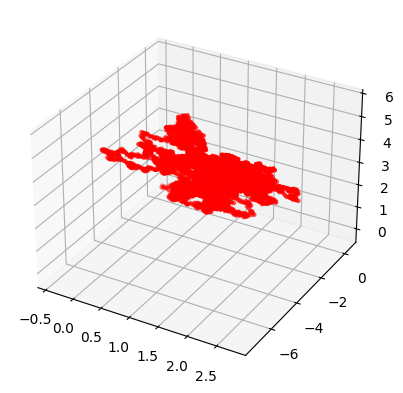

In [52]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = w[:,0]
y = w[:,1]
z = w[:,2]

ax1.scatter(x, y, z, c='r', marker='.')
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [145]:


def apostador(c_0):
  c_0 = 20
  capital = c_0
  volados = 0
  while capital > 0:
    volados += 1
    if capital >= 6:
      apuesta = capital/2
    else:
      apuesta = 2

    def_volado = np.random.choice([1,-1])
    capital += def_volado * apuesta
    capital = max(0,capital)

  return volados



def resultado(c_0):
  c_0 = 20
  apst = 10000
  r = []
  for i in range(apst):
    r.append(apostador(c_0))
  return r

resultados = resultado(20)



1. Grafique la evolución del capital hasta quedar en cero.

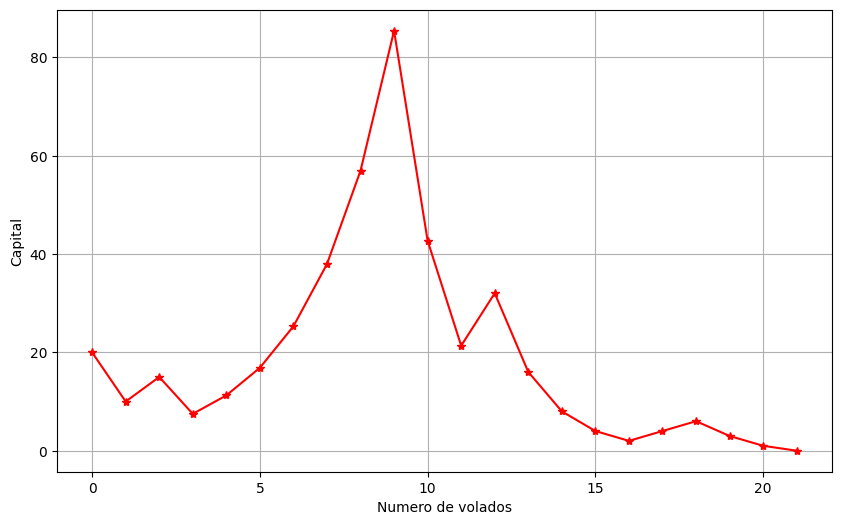

In [153]:
def apostador1(c_0):
  c_0 = 20
  capital = c_0
  volados = 0
  historial = [c_0]
  while capital > 0:
    volados += 1
    if capital >= 6:
      apuesta = capital/2
    else:
      apuesta = 2

    def_volado = np.random.choice([1,-1])
    capital += def_volado * apuesta
    capital = max(0,capital)
    historial.append(capital)

  return historial

ev = apostador1(20)


plt.figure(figsize=(10,6))
plt.plot(ev, color = 'r', marker ='*')
plt.xlabel("Numero de volados")
plt.ylabel("Capital")
plt.grid()

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [147]:
print(f"El numero de volados promedio para quedar en quiebra para 10,000 apostadores es de {np.mean(resultados)}")

El numero de volados promedio para quedar en quiebra para 10,000 apostadores es de 26.2071


3. Muestre un histograma del número de volados.

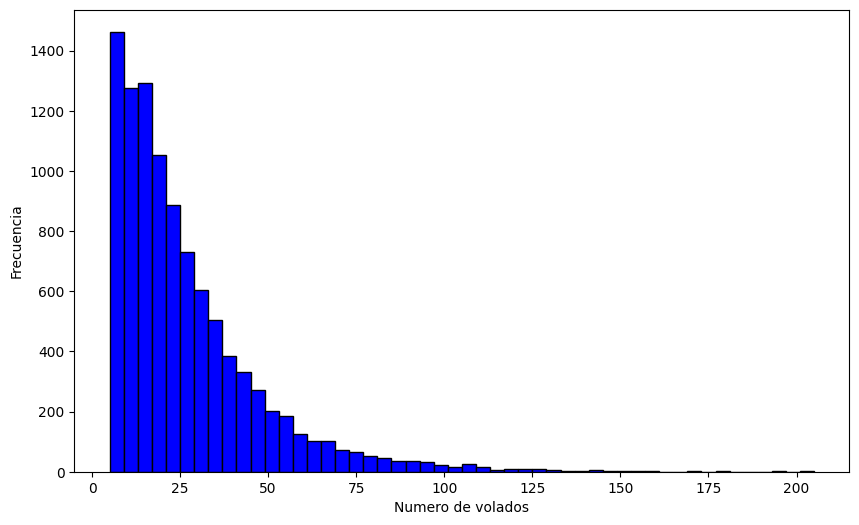

In [148]:
plt.figure(figsize=(10,6))
plt.hist(resultados, bins=50, color= 'b', edgecolor= 'black')
plt.xlabel("Numero de volados")
plt.ylabel("Frecuencia")
plt.show()
